# Chat Logs and Summaries

### Question 4:

##### [Link to chat log](https://chatgpt.com/share/66ff639f-ab58-8002-8300-d48f23679e19)

##### Chatbot-provided summary: 
"Here's a summary of our chat session:

1. **Bootstrap Confidence Interval**:
   - You asked how to generate a 95% bootstrap confidence interval for a population mean.
   - I provided a general approach, explaining the steps of loading the data, performing bootstrap resampling, and calculating the confidence interval.
   - You uploaded a CSV file containing a single numerical column labeled `variable`.
   
2. **Code for Bootstrap CI**:
   - I initially tried to calculate the bootstrap confidence interval using Python, but the tool wasn't available for this task.
   - I provided a Python code template that can be used with any dataset to calculate a 95% bootstrap confidence interval.

Let me know if you'd like further clarification or have any additional questions!"

---
# Question Responses

##### Question 1:

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard error of the mean (abbreviated as "SEM") of the original data is the standard deviation of all the sample means taken from the data, or in other words, the standard deviation of the sampling distribution of the mean, which is essentially the measure of the statistical accuracy of a sample mean as an estimation. In contrast, the standard deviation of the original data is simply the measure of the dispersion around the mean. In the context of bootstrapping the mean as in the pre-lecture video, the SEM of the original dataset can be calculated by taking the standard deviation of the bootstrapped dataset (which is the sampling distribution of the original dataset).

##### Question 2:
To generate a confidence interval that "covers 95% of the bootstrapped sample means" using the SEM, determine the outer bounds of the confidence interval by displacing the mean of a sample by the SEM. In other words, subtract and add the SEM to the sample mean to obtain the bounds of the confidence interval. This approach will only approximately cover 95% of the bootstrapped sample means due to not directly deriving from them.

##### Question 3:
To create a 95% bootstrapped confidence interval using the bootstrapped means, take the interval between the 2.5th percentile and the 97.5th percentile so that 5% of the range of the bootstrapped sample means lie outside of the interval. This can be done with numpy's `quantile(a, q)` function which returns the quantiles at the specified `q`th quartiles of the bootstrapped sample means (provided as the first argument): 

`np.quantile(bootstrapped_sample_means, [0.025, 0.975])`. 

This will return the quantiles at the 2.5% and 97.5% points, which are the lower and upper bounds of the 95% confidence interval, respectively. 

##### Question 4:

In [190]:
import numpy as np
import pandas as pd

data = pd.DataFrame(list((3625, 3200, 3725, 3800, 3675, 3650, 3900, 3975, 3300, 2850, 4500, 3950, 3950, 3500, 3450)))

values = data.iloc[:, 0].values

# Function to calculate bootstrap confidence interval
def bootstrap_mean_confidence_interval(data, n_bootstrap=10000, ci_percentile=95):
    sample_statistics = []
    for _ in range(n_bootstrap):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Change the argument inside the append function to some other statistic to change the population parameter
        sample_statistics.append(np.mean(bootstrap_sample))
        # For example, to instead calculate the 95% bootstrap confidence interval for the population median:
        # sample_statistics.append(np.median(bootstrap_sample))
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(sample_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(sample_statistics, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Calculate the bootstrap confidence interval
bootstrap_ci = bootstrap_mean_confidence_interval(values)
print(f"95% Bootstrap Confidence Interval: {bootstrap_ci}")

95% Bootstrap Confidence Interval: (3480.0, 3858.3749999999995)


##### Question 5:
Sample statistics, statistics calculated from population samples, are used to generate confidence intervals, which predict population parameters. They must be distinguished because they are wholly distinct kinds of data and trying to interchange the two in regards to confidence intervals is senseless; one is a statistic representative of the whole population and.the other is a statistic representative of a smaller sample, and the purpose of a confidence interval is essentially to use one to estimate the other.

##### Question 6:
1. The process of bootstrapping is when you take a single sample of data from a larger dataset and generate more data samples by randomly picking points of data from the original sample to form a "bootstrapped" set of data. These new bootstrapped samples have the same number of data points in the original and are allowed to have duplicate data points. After generating a large number of these bootstrapped data samples, you can then calculate some kind of property from each of them, such as, for example, the mean. If you then group the means with the same numerical value together and count how many are in each group, you can determine the probability of getting each value if you randomly picked one of the many bootstrapped samples and checked the value of its mean. This probability of getting each possible mean is approximately the same as if you instead took a sample from the larger dataset and checked its mean.

2. The main purpose of bootstrapping is to determine the probability of getting some calculated value (such as the mean) when you pick a random sample of data from a dataset. For example, if you want to determine the mean life expectancy of all the trees in a forest, it would be unrealistic to determine and record the life expectancy of every tree. Instead, you could either generate a bunch of data samples by repeatedly picking a few random trees to record, or you could take only a single data sample of randomly chosen trees and bootstrap it, which would allow you to approximate what the means of a bunch of imaginary data samples would be using probability.

3. You could firstly use bootstrapping to determine the values of what averages you might get and the probability of getting each one if you took a random sample of the population, and then generate a 95% confidence interval, which in simple terms means to exclude the least likely averages from your consideration by ignoring the 5% percentile with the least likely frequency of occurance. This will result in there being a 95% chance that the true average of the population is one of the values in the remaining bootstrapped probabilities. This would allow you to assess the plausibility of your guess by showing you how probable your guess is; if your guess was part of the 5% that was eliminated, then it is so improbable that your guess was correct that it is safe to say it wasn't, assuming enough repetitions were done in the bootstrapping step. 

##### Question 7:
If a sample mean falls within the confidence interval, it means it is probable that the sample mean is the actual population mean, with the exact probability being equal to the confidence level. Therefore such a confidence interval fails to reject the null hypothesis because assuming zero is the null value in this scenario, the confidence interval bounding zero means that zero is a possible value for the actual population mean, meaning the possibility that the mean effect of whatever is being studied is null cannot be eliminated. 

A different case in this context in it would be reasonable to reject the null hypothesis would be one in which the mean of zero lied outside of the confidence interval, assuming the confidence level is sufficiently high, such as 95% or above.


##### Question 8:
This is an analysis of the effectiveness of the vaccine created by AliTech using the data the company has released containing the initial and final patient health scores.

In this context, a null hypothesis would be the hypothesis that the AliTech vaccine has no statistically significant effect on the health of those who take it.

As a brief overview of the data, here are two box plots comparing the initial and final health scores.

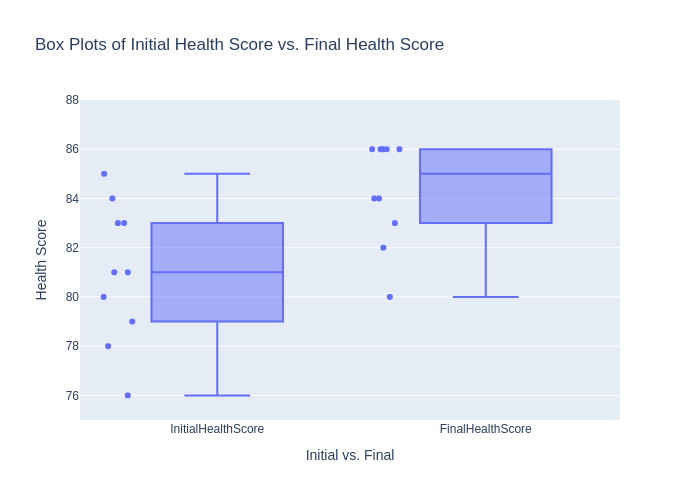

In [191]:
import numpy as np
import pandas as pd
import plotly.express as px

# import vaccine data
df_initial = pd.read_csv('https://raw.githubusercontent.com/wedeng/STA130/master/vaccine.csv')

# these are effectively labels for the x axis and y axis
x = 'Initial vs. Final'
y = 'Health Score'

# show and generate a plot consisting of two box plots, one each for the columns InitialHealthScore and FinalHealthScore
px.box(df_initial.iloc[:,3:].melt(var_name=x, value_name=y), x=x, y=y, title='Box Plots of Initial Health Score vs. Final Health Score', range_y=[75, 88], points='all').show(renderer='png')

It is clearly visible that the righthand box plot, the one representing the final health score, is overall higher than the one on the left representing the initial health score, although the two plots do have some overlap. 

However, despite the mean and median of the final health score being higher than the one to the left, we cannot definitively conclude that the effect of the vaccine must be positive on average; as visible on the left of each box plot, the dataset is very small, consisting of only 10 people who took the vaccine. 

To work around this small sample size, here is a histogram showing the frequency distribution of the mean change in health score in the patients who took the vaccine generated using bootstrapping. The graph is centered on the vertical pink line marking the null value of zero, along with a blue area indicating the 95% confidence interval.

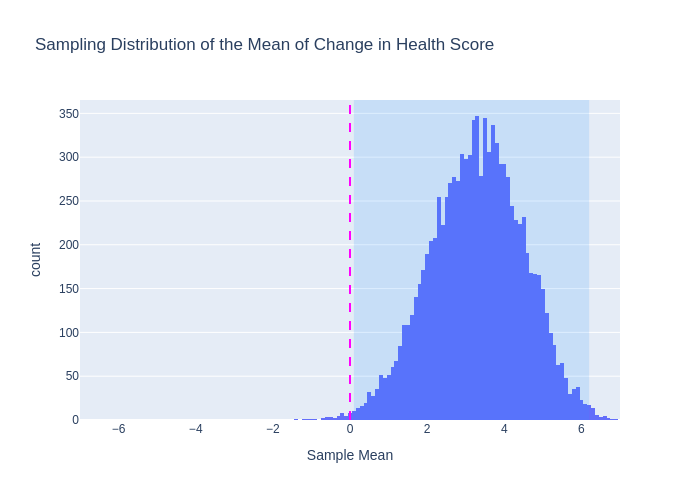

In [192]:
# make a new column called "DeltaHealthScore" containing the difference between columns FinalHealthScore and InitialHealthScore
df['DeltaHealthScore'] = df_initial['FinalHealthScore'] - df_initial['InitialHealthScore'] 

# set random seed
np.random.seed(1357539)

# bootstrap 10k sample means from column DeltaHealthScore and add to list sample_mean
sample_mean = []

for _ in range(10000):
    bs_sample = np.random.choice(df['DeltaHealthScore'], size=len(df), replace=True)
    sample_mean.append(np.mean(bs_sample))
    
# calculate the lower and upper bounds of a 99% confidence interval
cl = 99
lower = np.percentile(sample_mean, (100 - cl)/2)
upper = np.percentile(sample_mean, 100 - (100 - cl)/2)

# create a dataframe using the list of bootstrapped sample means and then create a histogram from it
df_mean = pd.DataFrame(sample_mean)
fig_mean = px.histogram(df_mean, x=df_mean.iloc[:, 0], range_x=[-7, 7], labels={'x':'Sample Mean'}, title='Sampling Distribution of the Mean of Change in Health Score')

# draw a line marking 0 and a rectangle spanning the confidence interval
fig_mean.add_vrect(x0=lower, x1=upper, fillcolor='DodgerBlue', opacity=0.15, line_width=0)
fig_mean.add_vline(x=0, line_dash='dash', line_color='fuchsia')

fig_mean.show(renderer='png')

This sampling distribution of the mean change in health score was generated by bootstrapping a large number of samples (ten thousand) from the difference between the final health score and the initial health score recorded in the vaccine patient data released by AliTech. This health score value essentially represents whether a patient who took the vaccine improved or not; a negative value indicates a decline in health, a positive value indicates improvement, and a value of zero indicates no change. Therefore the mean of this value indicates the average effect of the vaccine. By estimating this mean, the effectiveness of the vaccine can be quantitatively evaluated. 

By taking the means of the many bootstrapped samples, the probable actual mean effect of the vaccine can be estimated by assessing which values of the mean occur most frequently. As shown in the histogram, the probability of the mean being positive is significantly higher than the mean being zero or negative, as the count of sample means is heavily concentrated to the right of the mean of zero. To measure this quantitatively, a confidence interval with a confidence level of 99% was used.

A 99% confidence interval means that there is a 99% chance the estimated population mean will fall inside of it, and a 1% chance the estimated value will fall outside of it, with the population mean referring to the average change in health score in the patients who took the vaccine, in this scenario. However, as shown in the graph, the mean of zero falls outside of the confidence interval. This means that the probability that the actual mean change in health score is zero, the null value, is less than 1%. 

This is enough to almost certainly disprove the null hypothesis, as the probability of the average effect of the vaccine truly being negligible is extremely unlikely. We can also conclude that it is nearly guaranteed that the vaccine has an average positive effect on the health of patients.

##### Question 9:
Yes.